# Import all kind of stuff

In [92]:
import numpy as np
from numpy.typing import NDArray
import matplotlib.pyplot as plt

import sys

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")

from utilities.corporate_design_colors_v4 import cmap, colors

from theory.models.btk import AB_of_E, Z_of_tau

from theory.models.ha import get_I_nA as get_I_nA_ha
from theory.models.btk import get_I_nA as get_I_nA_btk
from theory.models.fcs import get_I_nA as get_I_nA_fcs
from theory.models.utg import get_I_nA as get_I_nA_utg

from theory.models.constants import k_B_meV, G_0_muS

# Set plot fontsizes

In [93]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["axes.labelsize"] = 8
plt.rcParams["font.size"] = 9
plt.rcParams["legend.fontsize"] = 8
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8

In [94]:
textwidth = 4.25279  # in
textheight = 6.85173

print(
    " 1.0",
    textwidth,
    textheight,
    "\n",
    "0.9",
    0.9 * textwidth,
    0.9 * textheight,
    "\n",
    "0.8",
    0.8 * textwidth,
    0.8 * textheight,
    "\n",
    "0.7",
    0.7 * textwidth,
    0.7 * textheight,
    "\n",
    "0.6",
    0.7 * textwidth,
    0.7 * textheight,
    "\n",
    "0.5",
    0.5 * textwidth,
    0.5 * textheight,
    "\n",
    "0.4",
    0.4 * textwidth,
    0.4 * textheight,
    "\n",
)

 1.0 4.25279 6.85173 
 0.9 3.8275110000000003 6.166557 
 0.8 3.402232 5.481384 
 0.7 2.976953 4.796211 
 0.6 2.976953 4.796211 
 0.5 2.126395 3.425865 
 0.4 1.701116 2.740692 



# btk - dos
for Gamma = 0.0, Gamma/Delta = 0.05

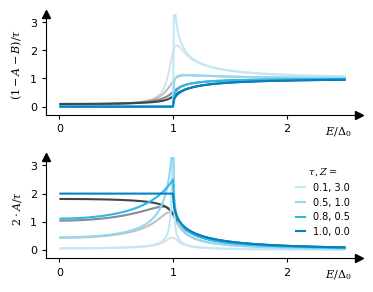

In [95]:
Delta_meV = 0.180
E_meV = np.linspace(0.01 * Delta_meV, 2.51 * Delta_meV, 251)
Gamma_meV = 0.05 * Delta_meV
tau = np.array([0.1, 0.5, 0.8, 1.0])

fig, [ax_1e, ax_2e] = plt.subplots(
    2,
    1,
    figsize=(3.8, 3),
)

for i, tau_i in enumerate(tau):
    Z_i = Z_of_tau(tau_i)
    A, B = AB_of_E(E_meV=E_meV, Delta_meV=Delta_meV, Z=Z_i, Gamma_meV=0.0)
    N_1e = (1 - A - B) / tau_i
    N_2e = 2 * A / tau_i

    ax_1e.plot(
        E_meV / Delta_meV,
        N_1e,
        color=cmap(clim=[0.1, 0.8], inverse=True)(i / len(tau)),
        zorder=10 + i,
        label=f"{tau_i:.1f}, {np.round(Z_i, 2):.1f}",
    )
    ax_2e.plot(
        E_meV / Delta_meV,
        N_2e,
        color=cmap(clim=[0.1, 0.8], inverse=True)(i / len(tau)),
        zorder=10 + i,
        label=f"{tau_i:.1f}, {np.round(Z_i, 2):.1f}",
    )

    A, B = AB_of_E(E_meV=E_meV, Delta_meV=Delta_meV, Z=Z_i, Gamma_meV=Gamma_meV)
    N_1e = (1 - A - B) / tau_i
    N_2e = 2 * A / tau_i

    ax_1e.plot(
        E_meV / Delta_meV,
        N_1e,
        color=cmap(clim=[0.1, 0.8], inverse=True, color="grau")(i / len(tau)),
        zorder=i,
    )
    ax_2e.plot(
        E_meV / Delta_meV,
        N_2e,
        color=cmap(clim=[0.1, 0.8], inverse=True, color="grau")(i / len(tau)),
        zorder=i,
    )

color = "k"
for ax in [ax_1e, ax_2e]:
    ax.set_ylim([-0.3, 3.3])

    # Remove frame
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()

    ax_trans = ax.get_xaxis_transform()
    # Draw arrow heads
    ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
    ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

    # Simplify ticks
    ax.set_xticks([0, 1, 2])
    # ax.set_yticks([0, 1])
    ax.tick_params(
        axis="both",
        direction="out",
        length=3,
        labelsize=8,
        color=color,
        labelcolor=color,
    )

    ax.set_yticks([0, 1, 2, 3])
    ax.text(x_lim[1] - 0.3, -0.9, "$E/\\Delta_0$", ha="left", va="center", fontsize=8)

ax_1e.set_ylabel("$(1 - A - B)/\\tau$")
ax_2e.set_ylabel("$2\\cdot A / \\tau$")

ax_2e.legend(
    title="$\\tau\\,, Z = $",
    handlelength=1.0,
    loc="upper right",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
)

fig.tight_layout()
fig.savefig("btk-dos.pgf")
fig.savefig("btk-dos.pdf")

# btk-current
at T=0 and T=0.3K

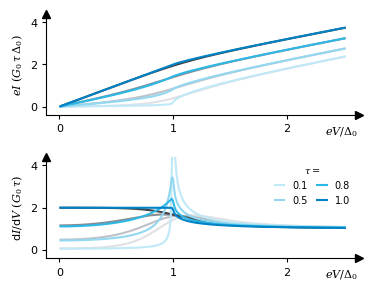

In [96]:
Delta_meV = 0.180
Gamma_meV = 0.0
T_K = 0.3
V_mV = np.linspace(0.01 * Delta_meV, 2.51 * Delta_meV, 251)
tau = np.array([0.1, 0.5, 0.8, 1.0])

fig, [ax_iv, ax_didv] = plt.subplots(
    2,
    1,
    figsize=(3.8, 3),
)

for i, tau_i in enumerate(tau):
    I_nA = get_I_nA_btk(
        V_mV=V_mV, Delta_meV=Delta_meV, tau=tau_i, T_K=0.0, Gamma_meV=Gamma_meV
    )
    dIdV_nA = np.gradient(I_nA, V_mV, axis=0) / G_0_muS / tau_i
    I_nA /= G_0_muS * tau_i * Delta_meV

    ax_iv.plot(
        V_mV / Delta_meV,
        I_nA[:, 0],
        color=cmap(clim=[0.1, 0.8], inverse=True)(i / len(tau)),
        zorder=10 + i,
        label=f"{tau_i:.1f}",
    )
    ax_didv.plot(
        V_mV / Delta_meV,
        dIdV_nA[:, 0],
        color=cmap(clim=[0.1, 0.8], inverse=True)(i / len(tau)),
        zorder=10 + i,
        label=f"{tau_i:.1f}",
    )

    I_nA = get_I_nA_btk(
        V_mV=V_mV, Delta_meV=Delta_meV, tau=tau_i, T_K=T_K, Gamma_meV=Gamma_meV
    )
    dIdV_nA = np.gradient(I_nA, V_mV, axis=0) / G_0_muS / tau_i
    I_nA /= G_0_muS * tau_i * Delta_meV

    ax_iv.plot(
        V_mV / Delta_meV,
        I_nA[:, 0],
        color=cmap(clim=[0.1, 0.8], inverse=True, color="grau")(i / len(tau)),
        zorder=i,
    )
    ax_didv.plot(
        V_mV / Delta_meV,
        dIdV_nA[:, 0],
        color=cmap(clim=[0.1, 0.8], inverse=True, color="grau")(i / len(tau)),
        zorder=i,
    )


color = "k"
for ax in [ax_iv, ax_didv]:
    ax.set_ylim([-0.4, 4.4])

    # Remove frame
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()

    ax_trans = ax.get_xaxis_transform()
    # Draw arrow heads
    ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
    ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

    # Simplify ticks
    ax.set_xticks([0, 1, 2])
    # ax.set_yticks([0, 1])
    ax.tick_params(
        axis="both",
        direction="out",
        length=3,
        labelsize=8,
        color=color,
        labelcolor=color,
    )

    ax.set_yticks([0, 2, 4])
    ax.text(x_lim[1] - 0.3, -1.2, "$eV/\\Delta_0$", ha="left", va="center", fontsize=8)

ax_iv.set_ylabel("$eI\\ (G_0\\, \\tau\\, \\Delta_0)$")
ax_didv.set_ylabel("d$I/$d$V\\ (G_0\\,\\tau)$")

ax_didv.legend(
    title="$\\tau = $",
    handlelength=1.0,
    loc="upper right",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=2,
    columnspacing=1,
)

fig.tight_layout()
fig.savefig("btk-current.pgf")
fig.savefig("btk-current.pdf")

# ha-current

In [97]:
# load and thread data

data = np.load("carlosHA.npz")
taus = data["tau"][1:]
eV_Delta = data["eV_Delta"]
eI_DeltaG_0 = data["eI_DeltaG_0"][1:, :]

taus = np.concatenate((taus[:2], taus[3:]))

eI_DeltaG_0 = np.concatenate((eI_DeltaG_0[:2, :], eI_DeltaG_0[3:, :]))

eV_Delta_max = 3.5
index = np.argmin(np.abs(eV_Delta - eV_Delta_max))
eV_Delta = eV_Delta[:index]
eI_DeltaG_0 = eI_DeltaG_0[:, :index]

dIdV_G_0 = np.gradient(eI_DeltaG_0, eV_Delta, axis=1)
dIdV_G_0[:, 0] = 0.0
dIdV_G_0[-1, 0] = np.inf
dIdV_G_0 = np.concatenate((dIdV_G_0[:, :159], dIdV_G_0[:, 161:]), axis=1)
eV_Delta2 = np.concatenate((eV_Delta[:159], eV_Delta[161:]))
deV_Delta = float((np.max(eV_Delta) - np.min(eV_Delta)) / (len(eV_Delta) - 1))

indices = [6, 22, -12, -1]
[9, 10, 159, 160]

[9, 10, 159, 160]

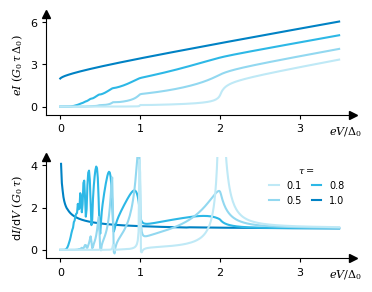

In [98]:
%matplotlib inline
V_mV = eV_Delta * Delta_meV
V = eV_Delta
V2 = eV_Delta2
Delta_meV = 0.180
Gamma_meV = 0.05 * Delta_meV
T_K = 0.0
tau = taus[indices]
I = eI_DeltaG_0[indices, :]
dIdV = dIdV_G_0[indices, :]
dIdV, I

V3 = V2
dIdV3 = dIdV_G_0[-1, :]
V3 = np.concatenate((V3[:9], V3[11:]))
dIdV3 = np.concatenate((dIdV3[:9], dIdV3[11:]))


fig, [ax_iv, ax_didv] = plt.subplots(
    2,
    1,
    figsize=(3.8, 3),
)

for i, tau_i in enumerate(tau):
    ax_iv.plot(
        V,
        I[i, :] / tau_i,
        color=cmap(clim=[0.1, 0.8], inverse=True)(i / len(tau)),
        zorder=10 - i,
        label=f"{tau_i:.1f}",
    )
    if tau_i != 1.0:
        ax_didv.plot(
            V2,
            dIdV[i, :] / tau_i,
            color=cmap(clim=[0.1, 0.8], inverse=True)(i / len(tau)),
            zorder=10 - i,
            label=f"{tau_i:.1f}",
        )
    else:
        ax_didv.plot(
            V3,
            dIdV3 / tau_i,
            color=cmap(clim=[0.1, 0.8], inverse=True)(i / len(tau)),
            zorder=10 - i,
            label=f"{tau_i:.1f}",
        )


    # I_nA = get_I_nA_ha(
    #     V_mV=V_mV,
    #     Delta_meV=np.array([Delta_meV, Delta_meV]),
    #     tau=tau_i,
    #     T_K=T_K,
    #     Gamma_meV=np.array([Gamma_meV, Gamma_meV]),
    # )
    # dIdV_nA = np.gradient(I_nA, V_mV) / G_0_muS / tau_i
    # I_nA /= G_0_muS * tau_i * Delta_meV

    # ax_iv.plot(
    #     V_mV / Delta_meV,
    #     I_nA,
    #     color=cmap(clim=[0.1, 0.8], inverse=True, color="grau")(i / len(tau)),
    #     zorder=i,
    # )
    # ax_didv.plot(
    #     V_mV / Delta_meV,
    #     dIdV_nA,
    #     color=cmap(clim=[0.1, 0.8], inverse=True, color="grau")(i / len(tau)),
    #     zorder=i,
    # )


ax_iv.set_ylim([-0.6, 6.6])
ax_iv.set_yticks([0, 3, 6])
ax_didv.set_ylim([-0.4, 4.4])
ax_didv.set_yticks([0, 2, 4])
color = "k"
for ax in [ax_iv, ax_didv]:

    # Remove frame
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()

    ax_trans = ax.get_xaxis_transform()
    # Draw arrow heads
    ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
    ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

    # Simplify ticks
    ax.set_xticks([0, 1, 2, 3])
    # ax.set_yticks([0, 1])
    ax.tick_params(
        axis="both",
        direction="out",
        length=3,
        labelsize=8,
        color=color,
        labelcolor=color,
    )

ax_didv.text(x_lim[1] - 0.3, -1.2, "$eV/\\Delta_0$", ha="left", va="center", fontsize=8)
ax_iv.text(x_lim[1] - 0.3, -1.8, "$eV/\\Delta_0$", ha="left", va="center", fontsize=8)

ax_iv.set_ylabel("$eI\\ (G_0\\, \\tau\\, \\Delta_0)$")
ax_didv.set_ylabel("d$I/$d$V\\ (G_0\\,\\tau)$")

ax_didv.legend(
    title="$\\tau = $",
    handlelength=1.0,
    loc="upper right",
    frameon=False,
    fontsize=7,
    title_fontsize=7,
    ncols=2,
    columnspacing=1,
)

fig.tight_layout()
fig.savefig("ha-current.pgf")
fig.savefig("ha-current.pdf")

# fcs-current

In [99]:
Delta_meV = 0.180
Gamma_meV = 0.0001
T_K = 0.0
dV_mV = 0.01
V_mV = np.linspace(0, 3.5 * Delta_meV, 351)
tau = np.array([0.1, 0.3, 0.5, 0.8])

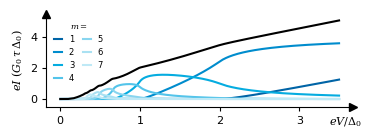

In [100]:
tau = 0.8
M = 7

fig, ax_iv = plt.subplots(
    1,
    1,
    figsize=(3.8, 1.5),
)

I = get_I_nA_fcs(
    V_mV=V_mV,
    Delta_meV=np.array([Delta_meV, Delta_meV]),
    tau=tau,
    T_K=0.0,
    Gamma_meV=np.array([Gamma_meV, Gamma_meV]),
)
dIdV = np.gradient(I, V_mV / Delta_meV, axis=0) / G_0_muS / tau
I /= Delta_meV * G_0_muS * tau

ax_iv.plot(
    V_mV / Delta_meV,
    I[:, 0],
    color="k",
    # color=colors(0),
    # color=cmap(clim=[0.1, 0.8], inverse=True)(i / len(tau)),
    zorder=10 + i,
)
for m in range(1, M + 1):
    ax_iv.plot(
        V_mV / Delta_meV,
        I[:, m],
        # color=colors(0),
        color=cmap(clim=[0.1, 0.8], inverse=True)(1 - m / M),
        zorder=10 - i,
        label=f"{m}",
    )

for ax in [ax_iv]:
    ax.set_ylim([-0.5, 5.5])

    # Remove frame
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()

    ax_trans = ax.get_xaxis_transform()
    # Draw arrow heads
    ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
    ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

    # Simplify ticks
    ax.set_xticks([0, 1, 2, 3])
    # ax.set_yticks([0, 1])
    ax.tick_params(
        axis="both",
        direction="out",
        length=3,
        labelsize=8,
        color=color,
        labelcolor=color,
    )

    ax.set_yticks([0, 2, 4])
    ax.text(x_lim[1] - 0.3, -1.5, "$eV/\\Delta_0$", ha="left", va="center", fontsize=8)

ax_iv.set_ylabel("$eI\\ (G_0\\, \\tau\\, \\Delta_0)$")
ax_iv.legend(
    title="$m= $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=6,
    title_fontsize=6,
    ncols=2,
    columnspacing=1,
)

fig.tight_layout()
fig.savefig("fcs-08.pgf")
fig.savefig("fcs-08.pdf")

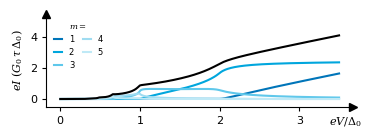

In [101]:
tau = 0.5
M = 5

fig, ax_iv = plt.subplots(
    1,
    1,
    figsize=(3.8, 1.5),
)

I = get_I_nA_fcs(
    V_mV=V_mV,
    Delta_meV=np.array([Delta_meV, Delta_meV]),
    tau=tau,
    T_K=0.0,
    Gamma_meV=np.array([Gamma_meV, Gamma_meV]),
)
dIdV = np.gradient(I, V_mV / Delta_meV, axis=0) / G_0_muS / tau
I /= Delta_meV * G_0_muS * tau

ax_iv.plot(
    V_mV / Delta_meV,
    I[:, 0],
    color="k",
    # color=colors(0),
    # color=cmap(clim=[0.1, 0.8], inverse=True)(i / len(tau)),
    zorder=10 + i,
)
for m in range(1, M + 1):
    ax_iv.plot(
        V_mV / Delta_meV,
        I[:, m],
        # color=colors(0),
        color=cmap(clim=[0.1, 0.8], inverse=True)(1 - m / M),
        zorder=10 - i,
        label=f"{m}",
    )

for ax in [ax_iv]:
    ax.set_ylim([-0.5, 5.5])

    # Remove frame
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()

    ax_trans = ax.get_xaxis_transform()
    # Draw arrow heads
    ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
    ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

    # Simplify ticks
    ax.set_xticks([0, 1, 2, 3])
    # ax.set_yticks([0, 1])
    ax.tick_params(
        axis="both",
        direction="out",
        length=3,
        labelsize=8,
        color=color,
        labelcolor=color,
    )

    ax.set_yticks([0, 2, 4])
    ax.text(x_lim[1] - 0.3, -1.5, "$eV/\\Delta_0$", ha="left", va="center", fontsize=8)

ax_iv.set_ylabel("$eI\\ (G_0\\, \\tau\\, \\Delta_0)$")
ax_iv.legend(
    title="$m= $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=6,
    title_fontsize=6,
    ncols=2,
    columnspacing=1,
)

fig.tight_layout()
fig.savefig("fcs-05.pgf")
fig.savefig("fcs-05.pdf")

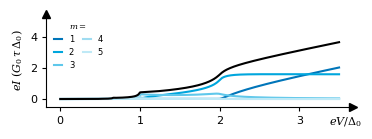

In [102]:
tau = 0.3
M = 5

fig, ax_iv = plt.subplots(
    1,
    1,
    figsize=(3.8, 1.5),
)

I = get_I_nA_fcs(
    V_mV=V_mV,
    Delta_meV=np.array([Delta_meV, Delta_meV]),
    tau=tau,
    T_K=0.0,
    Gamma_meV=np.array([Gamma_meV, Gamma_meV]),
)
dIdV = np.gradient(I, V_mV / Delta_meV, axis=0) / G_0_muS / tau
I /= Delta_meV * G_0_muS * tau

ax_iv.plot(
    V_mV / Delta_meV,
    I[:, 0],
    color="k",
    # color=colors(0),
    # color=cmap(clim=[0.1, 0.8], inverse=True)(i / len(tau)),
    zorder=10 + i,
)
for m in range(1, M + 1):
    ax_iv.plot(
        V_mV / Delta_meV,
        I[:, m],
        # color=colors(0),
        color=cmap(clim=[0.1, 0.8], inverse=True)(1 - m / M),
        zorder=10 - i,
        label=f"{m}",
    )

for ax in [ax_iv]:
    ax.set_ylim([-0.5, 5.5])

    # Remove frame
    for spine in ["top", "right"]:
        ax.spines[spine].set_visible(False)

    x_lim = ax.get_xlim()
    y_lim = ax.get_ylim()

    ax_trans = ax.get_xaxis_transform()
    # Draw arrow heads
    ax.plot(x_lim[1], y_lim[0], ">", color="k", clip_on=False)
    ax.plot(x_lim[0], y_lim[1], "^", color="k", clip_on=False)
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)

    # Simplify ticks
    ax.set_xticks([0, 1, 2, 3])
    # ax.set_yticks([0, 1])
    ax.tick_params(
        axis="both",
        direction="out",
        length=3,
        labelsize=8,
        color=color,
        labelcolor=color,
    )

    ax.set_yticks([0, 2, 4])
    ax.text(x_lim[1] - 0.3, -1.5, "$eV/\\Delta_0$", ha="left", va="center", fontsize=8)

ax_iv.set_ylabel("$eI\\ (G_0\\, \\tau\\, \\Delta_0)$")
ax_iv.legend(
    title="$m= $",
    handlelength=1.0,
    loc="upper left",
    frameon=False,
    fontsize=6,
    title_fontsize=6,
    ncols=2,
    columnspacing=1,
)
fig.tight_layout()
fig.savefig("fcs-03.pgf")
fig.savefig("fcs-03.pdf")

# PAMAR